<a href="https://colab.research.google.com/github/DiKachura/machine_learning/blob/main/%D0%92%D0%90%D0%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import preprocessing

In [86]:
data = pd.read_csv('/content/second (1).csv')

In [87]:
data

,Time (s),"dfi, V",iav/ilim+ new,experiment
0,0.0,0.0000,0.000000,1
1,0.5,0.0000,0.045000,1
2,1.0,0.0100,0.088000,1
3,1.5,0.0100,0.128000,1
4,2.0,0.0100,0.167000,1
...,...,...,...,...
2397,598.0,2.9900,0.035298,2
2398,598.5,2.9925,0.034819,2
2399,599.0,2.9950,0.040334,2
2400,599.5,2.9975,0.037463,2


In [88]:
data.describe()

,Time (s),"dfi, V",iav/ilim+ new,experiment
count,2402.000000,2402.000000,2402.000000,2402.000000
mean,300.000000,1.500162,1.094790,1.500000
std,173.385454,0.866938,1.163647,0.500104
min,0.000000,0.000000,-0.000002,1.000000
25%,150.000000,0.750000,0.029835,1.000000
50%,300.000000,1.500000,0.041730,1.500000
75%,450.000000,2.250000,2.356250,2.000000
max,600.000000,3.000000,3.297000,2.000000


In [89]:
data.isnull().sum()

Time (s)         0
dfi, V           0
iav/ilim+ new    0
experiment       0
dtype: int64

array([[<Axes: title={'center': 'Time (s)'}>,
        <Axes: title={'center': 'dfi, V'}>],
       [<Axes: title={'center': 'iav/ilim+ new'}>,
        <Axes: title={'center': 'experiment'}>]], dtype=object)

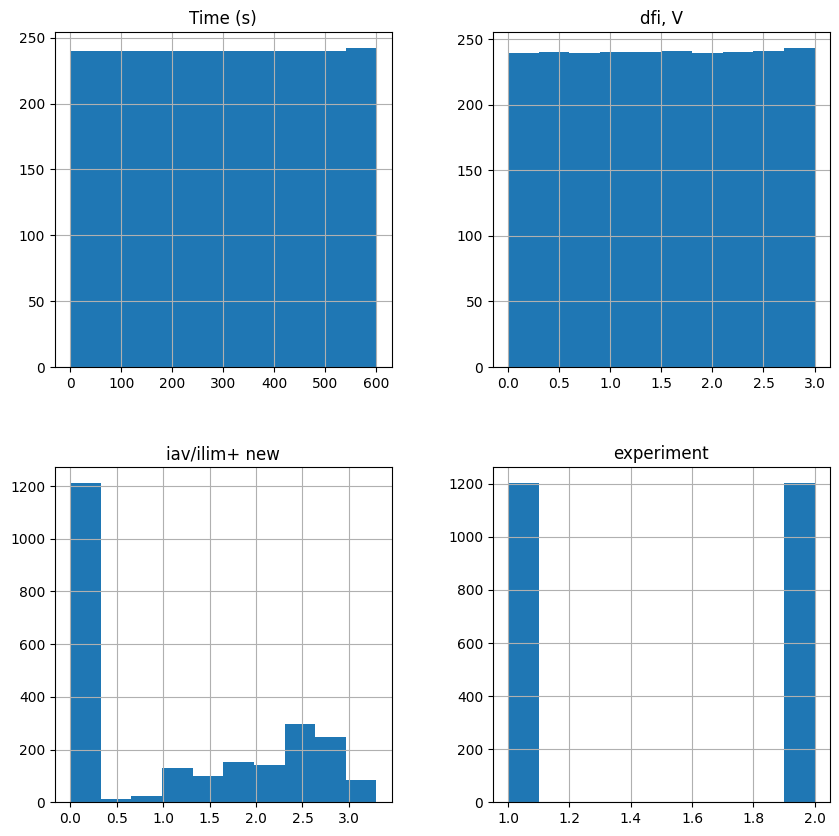

In [90]:
data.hist(data.columns, figsize=(10, 10))

<Axes: >

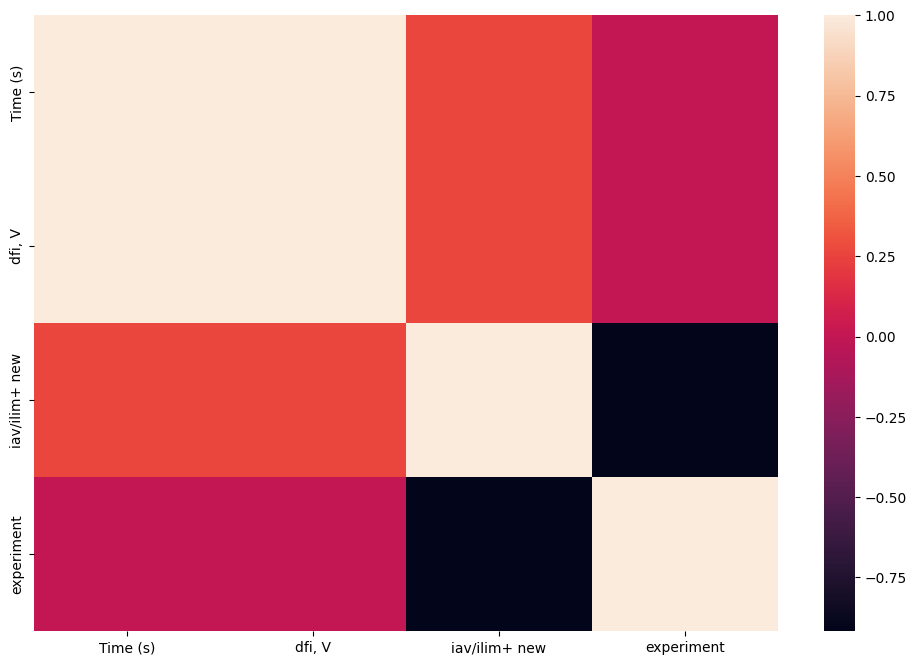

In [91]:
import seaborn as sns

plt.figure(figsize = (12,8))
sns.heatmap(data.corr())

In [93]:
X = data.drop('iav/ilim+ new', axis=1)
y = data['iav/ilim+ new']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

In [94]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [95]:
from sklearn.metrics import mean_squared_error
regressor = LinearRegression()

regressor.fit(X_train, y_train)
test_predictions = regressor.predict(X_test)

print('test mse: ', mean_squared_error(y_test, test_predictions))
print('r2 score: ', r2_score(y_test, test_predictions))

test mse:  0.13107006543348287
r2 score:  0.9037488765835449
